# Abrir los 303 archivos y unirlos en un solo dataframe

In [2]:
# %% Importar bibliotecas
import pandas as pd
import glob

# %% Configurar parámetros
ruta_carpeta = "./Comentarios AV 2024"  # Cambia esto si tus archivos están en otra carpeta
columnas_requeridas = ["Grupo", "Felicitaciones", "Sugerencias"]

# %% Leer y combinar archivos
archivos = glob.glob(ruta_carpeta + "/*.xlsx")
dataframes = []

for archivo in archivos:
    # Leer cada archivo
    df_temp = pd.read_excel(archivo)
    
    # Verificar columnas
    if not all(col in df_temp.columns for col in columnas_requeridas):
        print(f"Advertencia: {archivo} no tiene las columnas requeridas")
        continue
    
    # Seleccionar solo las columnas necesarias
    df_temp = df_temp[columnas_requeridas]
    dataframes.append(df_temp)

# Combinar todos los DataFrames
df_final = pd.concat(dataframes, ignore_index=True)

# %% Mostrar resultados
print(f"Se procesaron {len(archivos)} archivos")
print(f"DataFrame final: {df_final.shape[0]} filas x {df_final.shape[1]} columnas")
df_final.head()

Se procesaron 303 archivos
DataFrame final: 20159 filas x 3 columnas


,Grupo,Felicitaciones,Sugerencias
0,M23C1G31-001,- Me gusto mucho que mi asesor fuera comprensi...,- Me gustaría que sus sesiones y tuvieran un p...
1,M23C1G31-002,"- Es una excelente asesora, explica muy bien l...","- En lo personal, su forma de trabajar es exce..."
2,M23C1G31-003,- Es una buena asesora explica muy metódicamen...,"- Creo que no le hace falta nada, la verdad es..."
3,M23C1G31-004,- Excelente trabajo - Sus videoseiones son muy...,- Poner más imágenes en sus dispositivas - Nin...
4,M23C1G31-005,- Muchas gracias por su apoyo y comprensión.- ...,"- Todo bien- La forma de trabajo me gusto, en ..."


## Guardar el resultado en un archivo de excel

In [3]:
# %% Guardar resultado
df_final.to_excel("datos_combinados 2024.xlsx", index=False)
print("Archivo combinado guardado como 'datos_combinados 2024.xlsx'")

Archivo combinado guardado como 'datos_combinados 2024.xlsx'


# Abrir el archivo de datos unificado

In [30]:
import pandas as pd
df = pd.read_excel("datos_combinados 2024.xlsx")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20159 entries, 0 to 20158
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Grupo           20159 non-null  object
 1   Felicitaciones  19958 non-null  object
 2   Sugerencias     17345 non-null  object
dtypes: object(3)
memory usage: 472.6+ KB


## Comentarios por modulo

In [32]:
# Extraer el módulo de la columna Grupo (primeros 3 caracteres)
df['Modulo'] = df['Grupo'].str[:3]

# Conteo por módulo
conteo_modulos = df['Modulo'].value_counts().reset_index()
conteo_modulos.columns = ['Módulo', 'Cantidad de Registros']
print(conteo_modulos)

   Módulo  Cantidad de Registros
0     M2C                   1586
1     M1C                   1483
2     M4C                   1393
3     M3C                   1272
4     M5C                   1206
5     M0C                    869
6     M8C                    863
7     M7C                    851
8     M9C                    838
9     M6C                    824
10    M13                    777
11    M10                    745
12    M11                    737
13    M12                    737
14    M22                    669
15    M14                    663
16    M19                    630
17    M17                    629
18    M18                    625
19    M21                    574
20    M15                    561
21    M16                    551
22    M20                    538
23    M23                    538


## Grafica registros por modulo

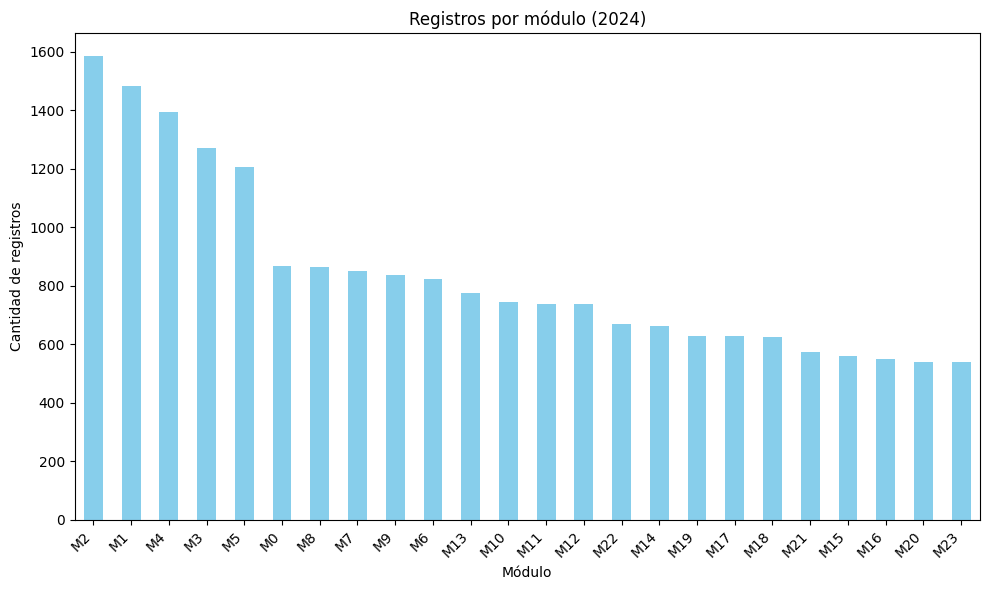


Conteo de Registros por Módulo:
Módulo
M2     1586
M1     1483
M4     1393
M3     1272
M5     1206
M0      869
M8      863
M7      851
M9      838
M6      824
M13     777
M10     745
M11     737
M12     737
M22     669
M14     663
M19     630
M17     629
M18     625
M21     574
M15     561
M16     551
M20     538
M23     538
Name: count, dtype: int64


In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Limpieza de módulos: Aseguramos que la columna 'Módulo' esté correctamente creada
df['Módulo'] = df['Grupo'].str[:3].str.replace(r'C$', '', regex=True)

# 2. Generación del gráfico de módulos
plt.figure(figsize=(10, 6)) # Puedes ajustar el tamaño para que se vea mejor
df['Módulo'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Registros por módulo (2024)')
plt.xlabel('Módulo')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje X para mayor legibilidad
plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para un diseño ajustado
plt.show()

# Opcional: Si quieres imprimir la tabla de conteo de módulos
print("\nConteo de Registros por Módulo:")
print(df['Módulo'].value_counts())

## Limpieza del texto

In [34]:
import pandas as pd
import re
import string

# 2. Funciones de limpieza
def limpiar_espacios(texto):
    return re.sub(r'\s+', ' ', texto)

def eliminar_puntuacion(texto):
    return texto.translate(str.maketrans('', '', string.punctuation))

def eliminar_stopwords(texto, stopwords):
    palabras = texto.split()
    palabras_filtradas = [pal for pal in palabras if pal not in stopwords]
    return ' '.join(palabras_filtradas)

# 3. Lista personalizada de stopwords (en minúsculas)
stopwords_personalizadas = set([
    'que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para',
    'es', 'al', 'del', 'se', 'lo', 'su', 'más', 'pero', 'no', 'muy', 'como', 'le', 'ha',
    'me', 'si', 'o', 'ya', 'todo', 'también', 'muy', 'sin', 'sobre', 'este', 'esta',
    'son', 'fue', 'ser', 'han', 'sus', 'gracias', 'mi', 'mucho', 'mis', 'nos', 'muchas', 
    'siempre', 'bien', 'agradezco', 'buenas', 'gran','usted', 'mas', 'así', 'e', 'a'
])

# 4. Limpiar columnas 'Felicitaciones' y 'Sugerencias'
for col in ['Felicitaciones', 'Sugerencias']:
    df[col] = df[col].fillna('').astype(str)  # Manejar nulos y asegurar strings
    df[col] = df[col].str.replace('-', ' ', regex=False)  # Reemplazar guiones por espacio
    df[col] = df[col].str.strip()  # Quitar espacios al inicio y final
    df[col] = df[col].str.lower()  # Convertir a minúsculas
    df[col] = df[col].apply(limpiar_espacios)  # Unificar espacios
    df[col] = df[col].apply(eliminar_puntuacion)  # Eliminar puntuación
    df[col] = df[col].apply(lambda texto: eliminar_stopwords(texto, stopwords_personalizadas))  # Eliminar stopwords

# Verificar resultados
df[['Felicitaciones', 'Sugerencias']].head()

,Felicitaciones,Sugerencias
0,gusto asesor fuera comprensivo dudas tuve gust...,gustaría sesiones tuvieran poco tiempo contest...
1,excelente asesora explica dudas temas cada sem...,personal forma trabajar excelente siga asesora...
2,buena asesora explica metódicamente accesible ...,creo hace falta nada verdad buen asesor explic...
3,excelente trabajo videoseiones interesantes co...,poner imágenes dispositivas ninguna asesor vir...
4,apoyo comprensión explica maestro hace observa...,forma trabajo gusto secciones grabadas pide av...


In [35]:
# Calcular longitudes (versión corregida)
longitudes = pd.DataFrame({
    'Felicitaciones': df['Felicitaciones'].str.len(),
    'Sugerencias': df['Sugerencias'].str.len()
})

# Mostrar estadísticas
print(longitudes.agg(['min', 'max', 'mean']))

      Felicitaciones  Sugerencias
min         0.000000     0.000000
max      6613.000000  6798.000000
mean      743.193164   199.425716


## Distribucion de longitud de texto

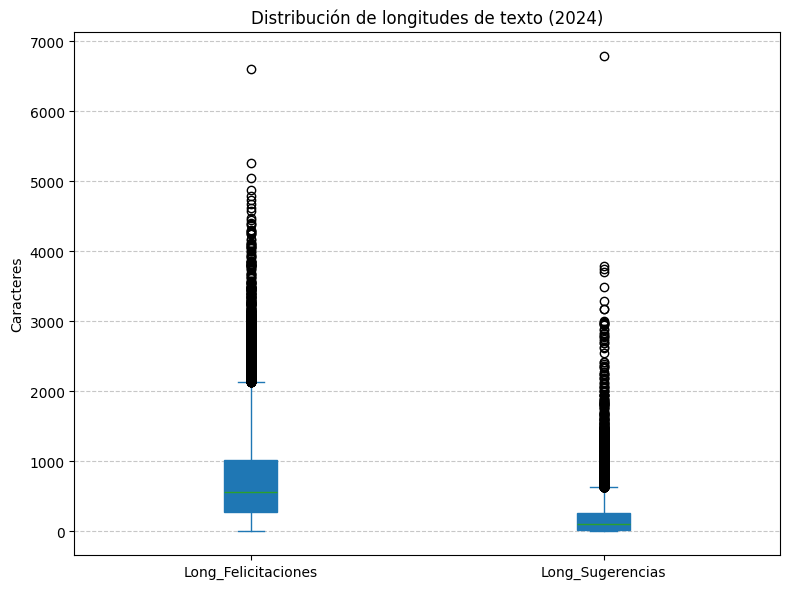


Estadísticas de longitud de texto (caracteres):
        Long_Felicitaciones  Long_Sugerencias
min                0.000000          0.000000
max             6613.000000       6798.000000
mean             743.193164        199.425716
median           565.000000        106.000000
std              644.231431        283.260906


In [36]:
import matplotlib.pyplot as plt
import pandas as pd # Necesitas pandas para manejar el DataFrame

# 1. Análisis de texto corregido y cálculo de longitudes (preprocesamiento necesario)
# Asegúrate de manejar los valores nulos antes de calcular la longitud.
df['Felicitaciones'] = df['Felicitaciones'].fillna('').astype(str)
df['Sugerencias'] = df['Sugerencias'].fillna('').astype(str)

df['Long_Felicitaciones'] = df['Felicitaciones'].str.len()
df['Long_Sugerencias'] = df['Sugerencias'].str.len()

# 2. Visualización: Gráfico de longitudes
plt.figure(figsize=(8, 6)) # Define un tamaño adecuado para una sola gráfica

long_df = df[['Long_Felicitaciones', 'Long_Sugerencias']]
# Usamos kind='box' para el boxplot, que es excelente para mostrar distribuciones
long_df.plot(kind='box', ax=plt.gca(), patch_artist=True)

plt.title('Distribución de longitudes de texto (2024)')
plt.ylabel('Caracteres')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula para mejor lectura
plt.tight_layout() # Asegura que el diseño esté ajustado
plt.show()

# Opcional: Mostrar las estadísticas de longitud de texto
print("\nEstadísticas de longitud de texto (caracteres):")
print(df[['Long_Felicitaciones', 'Long_Sugerencias']].agg(['min', 'max', 'mean', 'median', 'std']))


## Histograma de la cantidad de caracteres de las columnas "Felicitaciones" y "Sugerencias"

=== ESTADÍSTICAS FELICITACIONES ===
Total muestras: 20159
Mínimo: 0 caracteres
Percentil 25: 283 caracteres
Mediana: 565 caracteres
Percentil 75: 1021 caracteres
Percentil 90: 1595 caracteres
Máximo: 6613 caracteres
Media: 743.2 ± 644.2 caracteres

=== ESTADÍSTICAS SUGERENCIAS ===
Mínimo: 0 caracteres
Percentil 25: 25 caracteres
Mediana: 106 caracteres
Percentil 75: 266 caracteres
Percentil 90: 504 caracteres
Máximo: 6798 caracteres
Media: 199.4 ± 283.3 caracteres


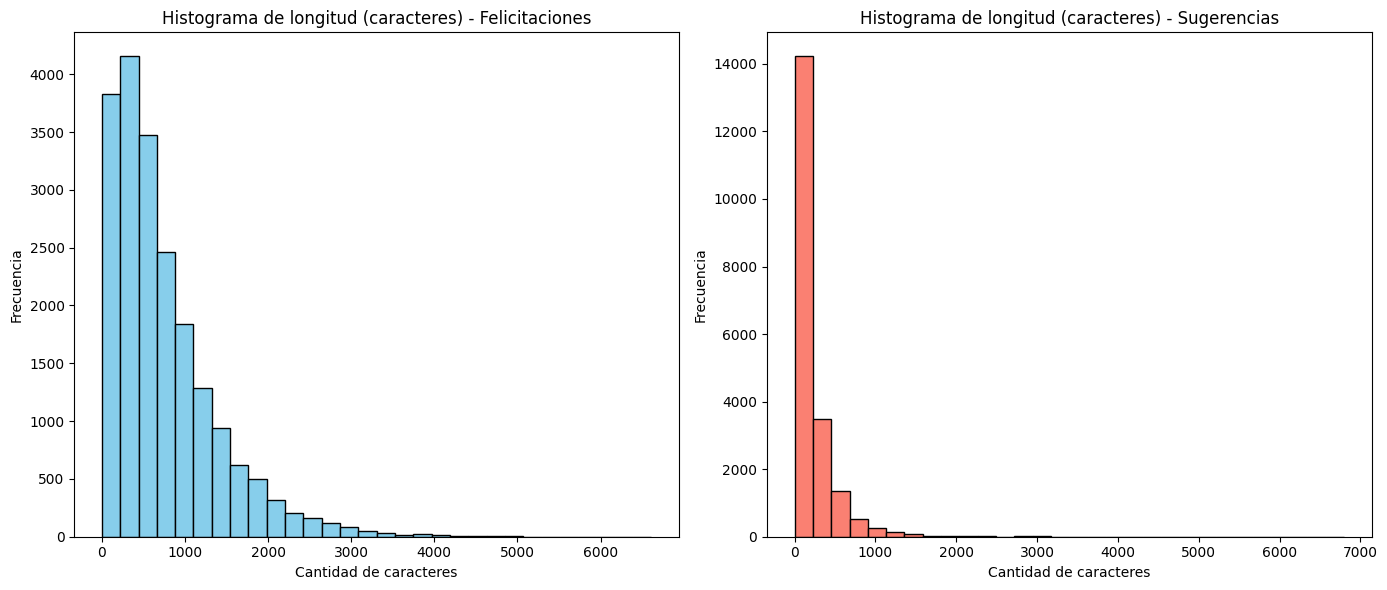

In [40]:
import matplotlib.pyplot as plt

# Asegurarse que las columnas no tengan valores nulos y sean strings
df['Felicitaciones'] = df['Felicitaciones'].fillna('').astype(str)
df['Sugerencias'] = df['Sugerencias'].fillna('').astype(str)

# Calcular longitud en caracteres
df['Len_Felicitaciones'] = df['Felicitaciones'].str.len()
df['Len_Sugerencias'] = df['Sugerencias'].str.len()

# Estadísticas descriptivas
stats_felicitaciones = df['Len_Felicitaciones'].describe(percentiles=[.25, .5, .75, .9])
stats_sugerencias = df['Len_Sugerencias'].describe(percentiles=[.25, .5, .75, .9])

# Print para análisis (cópialo y pégamelo cuando lo ejecutes)
print("=== ESTADÍSTICAS FELICITACIONES ===")
print(f"Total muestras: {len(df)}")
print(f"Mínimo: {stats_felicitaciones['min']:.0f} caracteres")
print(f"Percentil 25: {stats_felicitaciones['25%']:.0f} caracteres")
print(f"Mediana: {stats_felicitaciones['50%']:.0f} caracteres")
print(f"Percentil 75: {stats_felicitaciones['75%']:.0f} caracteres")
print(f"Percentil 90: {stats_felicitaciones['90%']:.0f} caracteres")
print(f"Máximo: {stats_felicitaciones['max']:.0f} caracteres")
print(f"Media: {stats_felicitaciones['mean']:.1f} ± {stats_felicitaciones['std']:.1f} caracteres")

print("\n=== ESTADÍSTICAS SUGERENCIAS ===")
print(f"Mínimo: {stats_sugerencias['min']:.0f} caracteres")
print(f"Percentil 25: {stats_sugerencias['25%']:.0f} caracteres")
print(f"Mediana: {stats_sugerencias['50%']:.0f} caracteres")
print(f"Percentil 75: {stats_sugerencias['75%']:.0f} caracteres")
print(f"Percentil 90: {stats_sugerencias['90%']:.0f} caracteres")
print(f"Máximo: {stats_sugerencias['max']:.0f} caracteres")
print(f"Media: {stats_sugerencias['mean']:.1f} ± {stats_sugerencias['std']:.1f} caracteres")



# Crear figura con dos histogramas lado a lado
plt.figure(figsize=(14,6))

# Histograma para Felicitaciones
plt.subplot(1, 2, 1)
plt.hist(df['Len_Felicitaciones'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de longitud (caracteres) - Felicitaciones')
plt.xlabel('Cantidad de caracteres')
plt.ylabel('Frecuencia')

# Histograma para Sugerencias
plt.subplot(1, 2, 2)
plt.hist(df['Len_Sugerencias'], bins=30, color='salmon', edgecolor='black')
plt.title('Histograma de longitud (caracteres) - Sugerencias')
plt.xlabel('Cantidad de caracteres')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


## Frecuencia de palabras y nube de palabras


Top 20 palabras en 'Felicitaciones':
asesora: 35995
asesor: 35572
actividades: 30233
dudas: 23976
módulo: 18070
sesiones: 15130
trabajo: 14428
tiempo: 14021
excelente: 13863
manera: 13490
ayuda: 13396
cada: 13355
paciencia: 10834
quiero: 10696
forma: 10654
explica: 10082
nuestras: 9415
clara: 9165
mejor: 9086
explicaciones: 7949


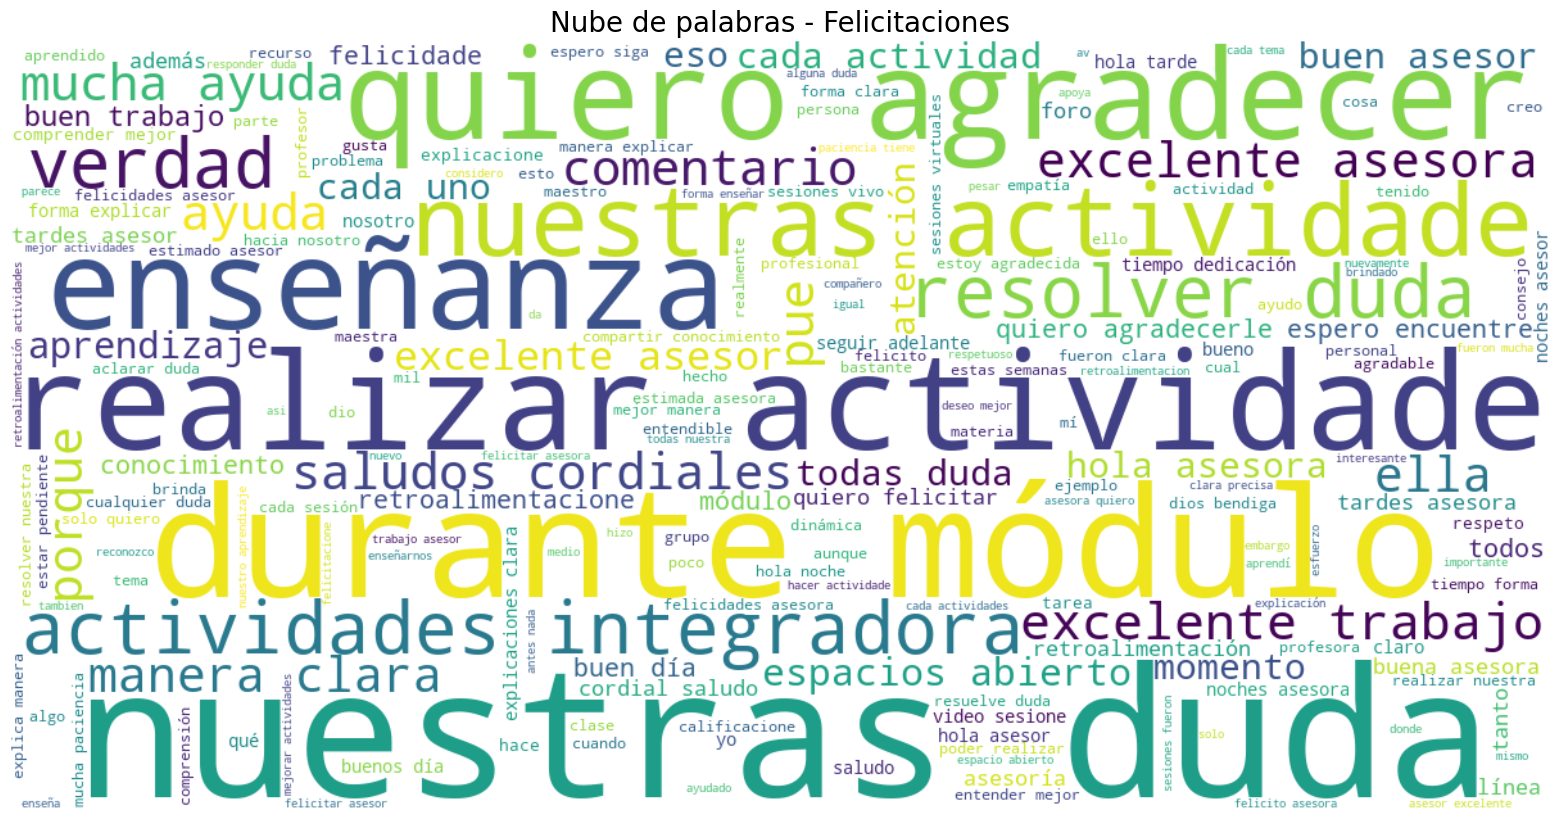

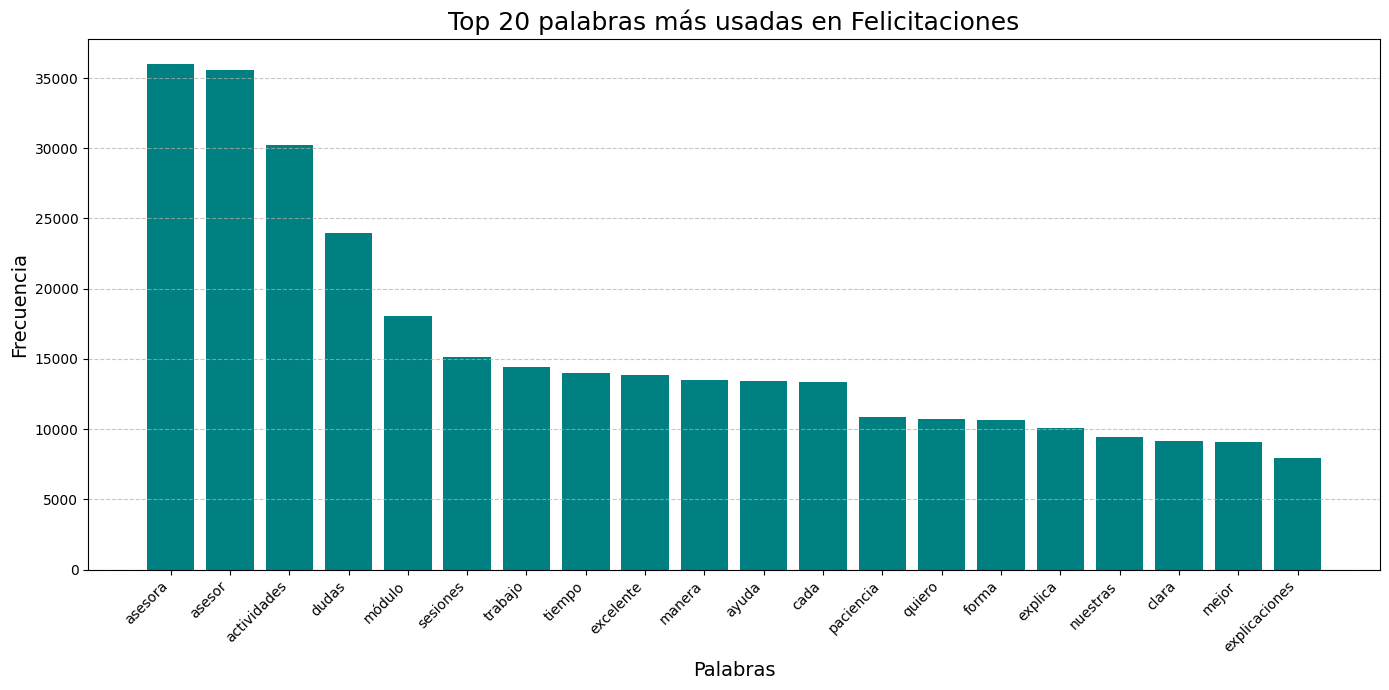


Top 20 palabras en 'Sugerencias':
actividades: 7076
asesor: 5931
asesora: 5218
siga: 4969
sesiones: 4614
solo: 4078
trabajo: 3780
sugerencia: 3766
tiempo: 3562
excelente: 3507
ninguna: 3395
tengo: 3134
poco: 3030
dudas: 2969
manera: 2533
mejor: 2463
forma: 2346
módulo: 2316
porque: 2270
gustaría: 2213


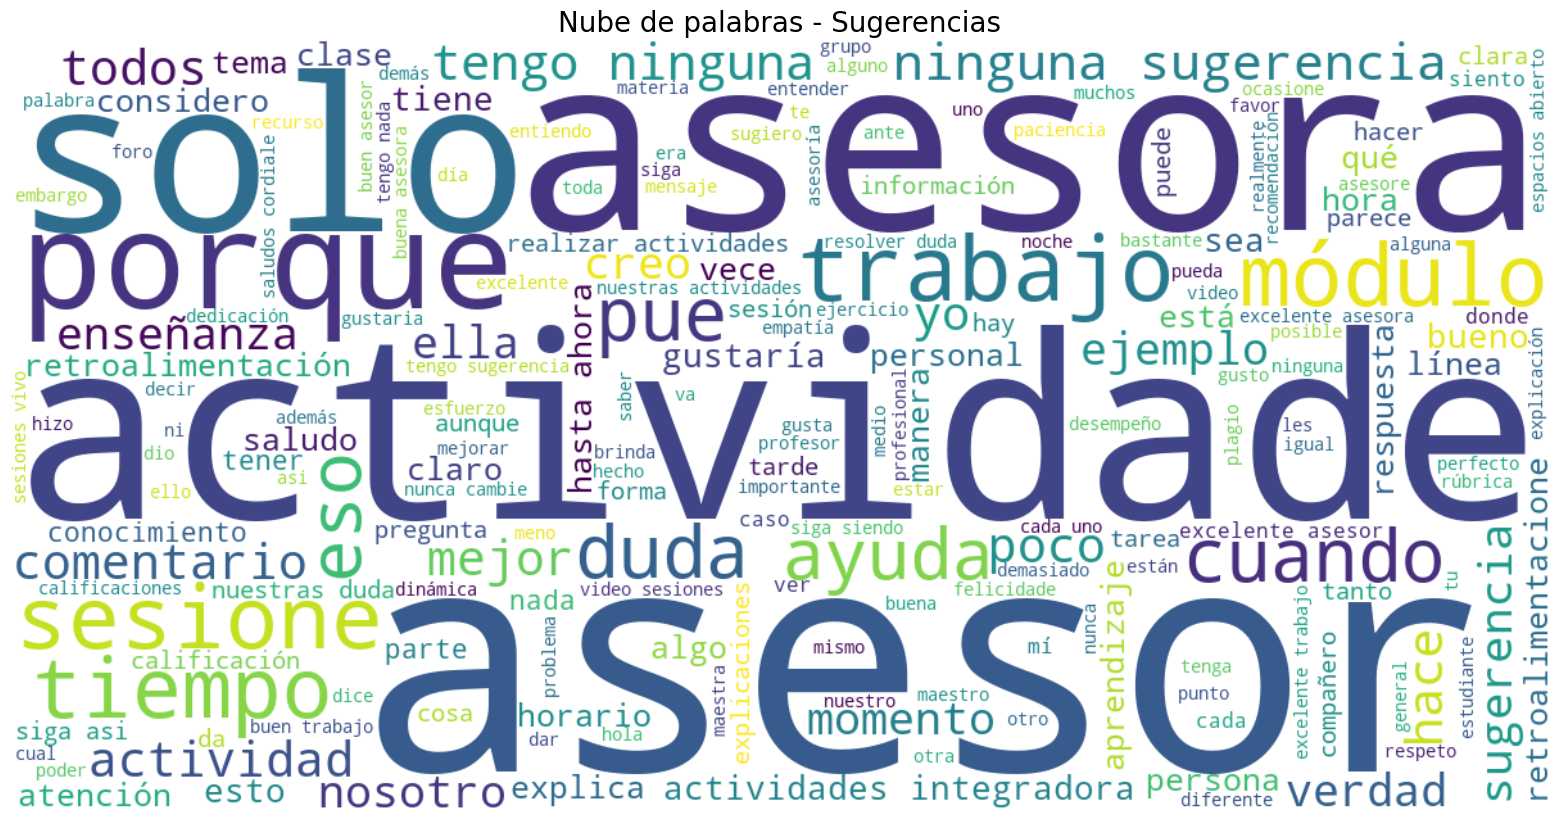

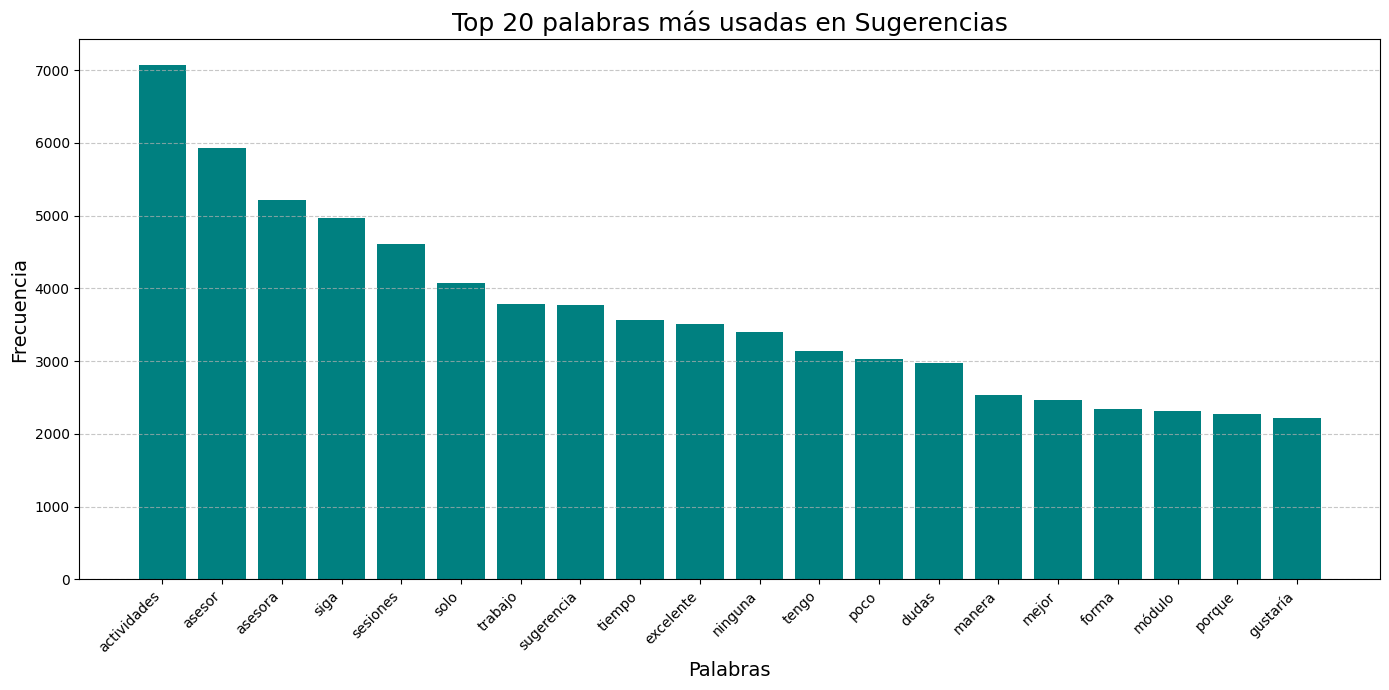

In [41]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import re # Necesario para la función limpiar_espacios que mencionaste previamente
import string # Necesario para eliminar_puntuacion


# 2. Funciones de limpieza (asegúrate de que estén definidas o importadas si vienen de otro script)
def limpiar_espacios(texto):
    return re.sub(r'\s+', ' ', texto)

def eliminar_puntuacion(texto):
    return texto.translate(str.maketrans('', '', string.punctuation))

def eliminar_stopwords(texto, stopwords_set): # Renombrado para evitar conflicto con la variable global 'stopwords'
    palabras = texto.split()
    palabras_filtradas = [pal for pal in palabras if pal not in stopwords_set]
    return ' '.join(palabras_filtradas)

# 3. Lista personalizada de stopwords (en minúsculas)
stopwords_personalizadas = set([
    'que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para',
    'es', 'al', 'del', 'se', 'lo', 'su', 'más', 'pero', 'no', 'muy', 'como', 'le', 'ha',
    'me', 'si', 'o', 'ya', 'todo', 'también', 'muy', 'sin', 'sobre', 'este', 'esta',
    'son', 'fue', 'ser', 'han', 'sus', 'gracias', 'mi', 'mucho', 'mis', 'nos', 'muchas',
    'siempre', 'bien', 'agradezco', 'buenas', 'gran','usted', 'mas', 'así', 'e', 'a',
    # Añadí 'e', 'a' de tu lista previa y algunas comunes que suelen aparecer en comentarios
    'cursos', 'online', 'prepa', 'linea', 'sep', 'modulo', 'modulos', 'alumnos', 'estudiantes',
    'virtual', 'plataforma', 'clases', 'contenido', 'temas', 'semana', 'aprender', 'apoyo'
])

# Combinar con stopwords estándar de wordcloud
# Es importante asegurar que todas las palabras se procesen en minúsculas.
# El set de STOPWORDS de wordcloud es en minúsculas por defecto.
stopwords = STOPWORDS.union(stopwords_personalizadas)

# 4. Limpiar columnas 'Felicitaciones' y 'Sugerencias' antes de procesar_columna
# Este bloque de limpieza es crucial y debe ejecutarse antes de llamar a procesar_columna
for col in ['Felicitaciones', 'Sugerencias']:
    df[col] = df[col].fillna('').astype(str)
    df[col] = df[col].str.replace('-', ' ', regex=False)
    df[col] = df[col].str.strip()
    df[col] = df[col].str.lower()
    df[col] = df[col].apply(limpiar_espacios)
    df[col] = df[col].apply(eliminar_puntuacion)
    # Pasa el set de stopwords_personalizadas a la función
    df[col] = df[col].apply(lambda texto: eliminar_stopwords(texto, stopwords_personalizadas))


def procesar_columna(columna, nombre_columna):
    # Concatenar textos ya limpios (después de la ejecución del bucle for anterior)
    all_text = ' '.join(df[columna]) # Ya están limpios, no es necesario fillna('') o astype(str) aquí
    
    # Volvemos a tokenizar (por si las moscas, y para el Counter)
    tokens_finales = all_text.split()
    # No es necesario filtrar stopwords_personalizadas de nuevo, ya se hizo.
    # Pero la WordCloud requiere el set 'stopwords' para su propio filtro interno.

    # Contar palabras
    contador = Counter(tokens_finales) # Contar tokens_finales que ya están limpios

    # Mostrar las 20 palabras más comunes
    top_palabras = contador.most_common(20) # Ahora son 20, como pediste
    print(f"\nTop 20 palabras en '{nombre_columna}':")
    for palabra, freq in top_palabras:
        print(f"{palabra}: {freq}")

    # Generar nube de palabras
    # Se le pasa el texto completo (ya limpio y sin stopwords)
    wordcloud = WordCloud(
        width=1200,
        height=600,
        background_color='white',
        stopwords=stopwords, # Usa el set combinado de stopwords para WordCloud
        max_words=200
    ).generate(all_text) # all_text ya está filtrado por tu lógica de limpieza

    # Mostrar y guardar la nube de palabras
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de palabras - {nombre_columna}', fontsize=20)
    plt.tight_layout(pad=0)
    plt.savefig(f'nube_palabras_{nombre_columna.lower()}.jpg') # CAMBIO A .jpg
    plt.show()

    # Gráfico de barras para top 20 palabras
    palabras_top, frecuencias_top = zip(*top_palabras)
    plt.figure(figsize=(14,7))
    plt.bar(palabras_top, frecuencias_top, color='teal')
    plt.title(f'Top 20 palabras más usadas en {nombre_columna}', fontsize=18)
    plt.xlabel('Palabras', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.xticks(rotation=45, ha='right') # ha='right' para mejor alineación de etiquetas rotadas
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'top20_palabras_{nombre_columna.lower()}.jpg') # CAMBIO A .jpg (y nombre a top20)
    plt.show()

# Ejecutar para ambas columnas
procesar_columna('Felicitaciones', 'Felicitaciones')
procesar_columna('Sugerencias', 'Sugerencias')

## Top 3 de palabras por cada modulo

In [12]:
import pandas as pd
from collections import Counter
import re
import string

# 1. Preparar el DataFrame: Extraer Módulo y limpiar comentarios
# (Asegúrate de que estas funciones de limpieza sean las que usaste en tu preprocesamiento)
def limpiar_espacios(texto):
    return re.sub(r'\s+', ' ', texto)

def eliminar_puntuacion(texto):
    return texto.translate(str.maketrans('', '', string.punctuation))

# Lista personalizada de stopwords (asegúrate de que esta sea la que utilizaste)
stopwords_personalizadas = set([
    'que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para',
    'es', 'al', 'del', 'se', 'lo', 'su', 'más', 'pero', 'no', 'muy', 'como', 'le', 'ha',
    'me', 'si', 'o', 'ya', 'todo', 'también', 'muy', 'sin', 'sobre', 'este', 'esta',
    'son', 'fue', 'ser', 'han', 'sus', 'gracias', 'mi', 'mucho', 'mis', 'nos', 'muchas',
    'siempre', 'bien', 'agradezco', 'buenas', 'gran','usted', 'mas', 'así', 'e', 'a',
    'cursos', 'online', 'prepa', 'linea', 'sep', 'modulo', 'modulos', 'alumnos', 'estudiantes',
    'virtual', 'plataforma', 'clases', 'contenido', 'temas', 'semana', 'aprender', 'apoyo'
])

def eliminar_stopwords(texto, stopwords_set):
    palabras = texto.split()
    palabras_filtradas = [pal for pal in palabras if pal not in stopwords_set]
    return ' '.join(palabras_filtradas)

# Extraer Módulo de la columna 'Grupo'
df['Módulo'] = df['Grupo'].str[:3].str.replace(r'C$', '', regex=True)

# Limpiar las columnas 'Felicitaciones' y 'Sugerencias'
# ESTE ES EL PASO CRUCIAL PARA LA LIMPIEZA PREVIA
for col in ['Felicitaciones', 'Sugerencias']:
    df[col] = df[col].fillna('').astype(str) # Manejar nulos y asegurar strings
    df[col] = df[col].str.replace('-', ' ', regex=False) # Reemplazar guiones por espacio
    df[col] = df[col].str.strip() # Quitar espacios al inicio y final
    df[col] = df[col].str.lower() # Convertir a minúsculas
    df[col] = df[col].apply(limpiar_espacios) # Unificar espacios
    df[col] = df[col].apply(eliminar_puntuacion) # Eliminar puntuación
    # Eliminar stopwords usando la función con el set personalizado
    df[col] = df[col].apply(lambda texto: eliminar_stopwords(texto, stopwords_personalizadas))


# 2. Obtener el Top 3 de palabras por módulo y categoría
def obtener_top_palabras_por_modulo_y_categoria(df, num_top_words=3):
    results_list = []

    # Obtener la lista única de módulos (ordenada para consistencia)
    modulos_ordenados = ['M0', 'M2', 'M3', 'M1', 'M4', 'M5', 'M6', 'M7', 'M11', 'M14',
                         'M10', 'M8', 'M19', 'M22', 'M13', 'M9', 'M18', 'M12', 'M15',
                         'M23', 'M17', 'M20', 'M21', 'M16']

    for modulo in modulos_ordenados:
        row_data = {'Módulo': modulo}
        df_modulo = df[df['Módulo'] == modulo]

        for categoria in ['Felicitaciones', 'Sugerencias']:
            all_text_categoria = ' '.join(df_modulo[categoria].dropna().astype(str)) # dropna() por si hay filas completamente vacías en la columna
            
            tokens = all_text_categoria.split()
            tokens = [token for token in tokens if token.strip() != ''] # Eliminar posibles tokens vacíos
            
            contador_palabras = Counter(tokens)
            
            # Obtener el Top N palabras, excluyendo la palabra 'módulo' o 'modulo'
            # ya que es la categoría de agrupación
            top_n = []
            for word, freq in contador_palabras.most_common():
                if len(top_n) < num_top_words and word not in ['modulo', 'módulo']:
                    top_n.append((word, freq))
                elif len(top_n) >= num_top_words:
                    break
            
            # Si no hay suficientes palabras, rellenar con nulos o vacíos
            while len(top_n) < num_top_words:
                top_n.append(('', 0)) # Rellena con cadena vacía y frecuencia 0
                
            for i in range(num_top_words):
                row_data[f'{categoria}_Palabra{i+1}'] = top_n[i][0]
                row_data[f'{categoria}_Frecuencia{i+1}'] = top_n[i][1]
        
        results_list.append(row_data)

    return pd.DataFrame(results_list)

# Ejecutar la función
df_top_3_por_categoria = obtener_top_palabras_por_modulo_y_categoria(df, num_top_words=3)

# 3. Imprimir el DataFrame de resultados
print("\n--- Top 3 Palabras por Módulo y Categoría ---")
print(df_top_3_por_categoria)

# Opcional: Para exportar a CSV o Excel (si lo necesitas más tarde)
# df_top_3_por_categoria.to_csv('top_3_palabras_por_modulo_y_categoria.csv', index=False)
# df_top_3_por_categoria.to_excel('top_3_palabras_por_modulo_y_categoria.xlsx', index=False) # Requiere openpyxl instalado


--- Top 3 Palabras por Módulo y Categoría ---
   Módulo Felicitaciones_Palabra1  Felicitaciones_Frecuencia1  \
0      M0                   dudas                        3037   
1      M2                 asesora                        3208   
2      M3                 asesora                        2086   
3      M1                  asesor                        5172   
4      M4                 asesora                        2003   
5      M5                 asesora                        1517   
6      M6                 asesora                        1311   
7      M7                 asesora                        1141   
8     M11                 asesora                        1153   
9     M14                 asesora                         998   
10    M10                 asesora                        1087   
11     M8                 asesora                        1224   
12    M19                  asesor                        1606   
13    M22                 asesora          

## Top 10 palabras mas frecuentes por modulo y nube de palabras para "Felicitaciones" y "Sugerencias"

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Asumiendo que ya tienes la columna 'Módulo' creada así:
# df['Módulo'] = df['Grupo'].str[:3].str.replace(r'C$', '', regex=True)

def obtener_top10_palabras(df, modulo, categoria, stopwords_set):
    # Filtrar por módulo
    df_modulo = df[df['Módulo'] == modulo]

    # Concatenar todo el texto de la categoría para el módulo
    texto = ' '.join(df_modulo[categoria].dropna().astype(str))

    # Preprocesar texto: minusculas, eliminar puntuación, eliminar stopwords
    texto = texto.lower()
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    palabras = texto.split()
    palabras = [p for p in palabras if p not in stopwords_set and p.strip() != '' and p not in ['modulo', 'módulo']]

    # Contar frecuencia
    contador = Counter(palabras)
    top10 = contador.most_common(10)

    # Si hay menos de 10 palabras, completar con vacíos y ceros
    while len(top10) < 10:
        top10.append(('', 0))

    return top10, texto

def graficar_top10_y_nube(df, modulo, categoria, stopwords_set):
    top10, texto = obtener_top10_palabras(df, modulo, categoria, stopwords_set)

    palabras, frecuencias = zip(*top10)

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))

    # Gráfica de barras
    sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")
    axes[0].set_title(f"Top 10 palabras en '{categoria}' - {modulo}")
    axes[0].set_xlabel("Frecuencia")
    axes[0].set_ylabel("Palabra")

    # Nube de palabras
    wc = WordCloud(width=600, height=400, background_color='white', colormap='Blues',
                   stopwords=stopwords_set).generate(texto)
    axes[1].imshow(wc, interpolation='bilinear')
    axes[1].axis('off')
    axes[1].set_title(f"Nube de palabras en '{categoria}' - {modulo}")

    plt.tight_layout()
    filename = f"top10_nube_{modulo}_{categoria}.jpg"
    plt.savefig(filename, format='jpg', dpi=300)
    plt.close()
    print(f"Guardado: {filename}")

# Definir tu set personalizado de stopwords (como en tu código original)
stopwords_personalizadas = set([
    'que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para',
    'es', 'al', 'del', 'se', 'lo', 'su', 'más', 'pero', 'no', 'muy', 'como', 'le', 'ha',
    'me', 'si', 'o', 'ya', 'todo', 'también', 'muy', 'sin', 'sobre', 'este', 'esta',
    'son', 'fue', 'ser', 'han', 'sus', 'gracias', 'mi', 'mucho', 'mis', 'nos', 'muchas',
    'siempre', 'bien', 'agradezco', 'buenas', 'gran','usted', 'mas', 'así', 'e', 'a',
    'cursos', 'online', 'prepa', 'linea', 'sep', 'modulo', 'modulos', 'alumnos', 'estudiantes',
    'virtual', 'plataforma', 'clases', 'contenido', 'temas', 'semana', 'aprender', 'apoyo'
])

# Extraer módulos únicos ordenados (puedes ajustar el orden si quieres)
modulos = sorted(df['Módulo'].unique())

# Ejecutar para todos los módulos y ambas categorías
for modulo in modulos:
    for categoria in ['Felicitaciones', 'Sugerencias']:
        graficar_top10_y_nube(df, modulo, categoria, stopwords_personalizadas)
  


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M0_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M0_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M1_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M1_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M10_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M10_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M11_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M11_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M12_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M12_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M13_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M13_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M14_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M14_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M15_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M15_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M16_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M16_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M17_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M17_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M18_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M18_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M19_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M19_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M2_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M2_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M20_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M20_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M21_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M21_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M22_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M22_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M23_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M23_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M3_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M3_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M4_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M4_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M5_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M5_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M6_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M6_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M7_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M7_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M8_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M8_Sugerencias.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M9_Felicitaciones.jpg


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2127726301.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frecuencias), y=list(palabras), ax=axes[0], palette="Blues_d")


Guardado: top10_nube_M9_Sugerencias.jpg


## Bigramas "Felicitaciones"

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

stopwords_personalizadas = [
    'que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para',
    'es', 'al', 'del', 'se', 'lo', 'su', 'más', 'pero', 'no', 'muy', 'como', 'le', 'ha',
    'me', 'si', 'o', 'ya', 'todo', 'también', 'muy', 'sin', 'sobre', 'este', 'esta',
    'son', 'fue', 'ser', 'han', 'sus', 'gracias', 'mi', 'mucho', 'mis', 'nos', 'muchas', 
    'siempre', 'bien', 'agradezco', 'buenas', 'gran','usted', 'mas', 'así'
]

vectorizer = CountVectorizer(
    ngram_range=(2, 3),
    stop_words=stopwords_personalizadas,
    max_features=50
)

X = vectorizer.fit_transform(df['Felicitaciones'].fillna(''))

frecuencias = X.toarray().sum(axis=0)
terminos = vectorizer.get_feature_names_out()

df_ngrams = pd.DataFrame({'ngrama': terminos, 'frecuencia': frecuencias})
df_ngrams = df_ngrams.sort_values(by='frecuencia', ascending=False)

print(df_ngrams.head(15))

                      ngrama  frecuencia
33            nuestras dudas        4993
11            durante módulo        3529
37      realizar actividades        3476
34          quiero agradecer        2984
32      nuestras actividades        2966
0   actividades integradoras        2729
38            resolver dudas        2725
20         excelente trabajo        2525
29               mucha ayuda        2315
41         saludos cordiales        2260
28              manera clara        2075
19         excelente asesora        2066
18          excelente asesor        2036
13         espacios abiertos        1903
6             cada actividad        1847


## Trigramas en Felicitaciones

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

stopwords_personalizadas = [
    'que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para',
    'es', 'al', 'del', 'se', 'lo', 'su', 'más', 'pero', 'no', 'muy', 'como', 'le', 'ha',
    'me', 'si', 'o', 'ya', 'todo', 'también', 'muy', 'sin', 'sobre', 'este', 'esta',
    'son', 'fue', 'ser', 'han', 'sus', 'gracias', 'mi', 'mucho', 'mis', 'nos', 'muchas', 
    'siempre', 'bien', 'agradezco', 'buenas', 'gran','usted', 'mas', 'así'
]

vectorizer = CountVectorizer(
    ngram_range=(3, 3),
    stop_words=stopwords_personalizadas,
    max_features=50
)

X = vectorizer.fit_transform(df['Felicitaciones'].fillna(''))

frecuencias = X.toarray().sum(axis=0)
terminos = vectorizer.get_feature_names_out()

df_ngrams = pd.DataFrame({'ngrama': terminos, 'frecuencia': frecuencias})
df_ngrams = df_ngrams.sort_values(by='frecuencia', ascending=False)

print(df_ngrams.head(15))

                           ngrama  frecuencia
41        resolver nuestras dudas         904
39  realizar nuestras actividades         763
49           todas nuestras dudas         578
31     poder realizar actividades         567
8               cada uno nosotros         557
20             fueron mucha ayuda         501
45               sido mucha ayuda         447
1           asesor durante módulo         445
36        quiero felicitar asesor         442
14  espacios abiertos aprendizaje         428
37       quiero felicitar asesora         414
16           explica manera clara         406
33       quiero agradecer asesora         405
32        quiero agradecer asesor         402
5                buen día asesora         396


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2468359866.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15, y='ngrama', x='frecuencia', palette='viridis')


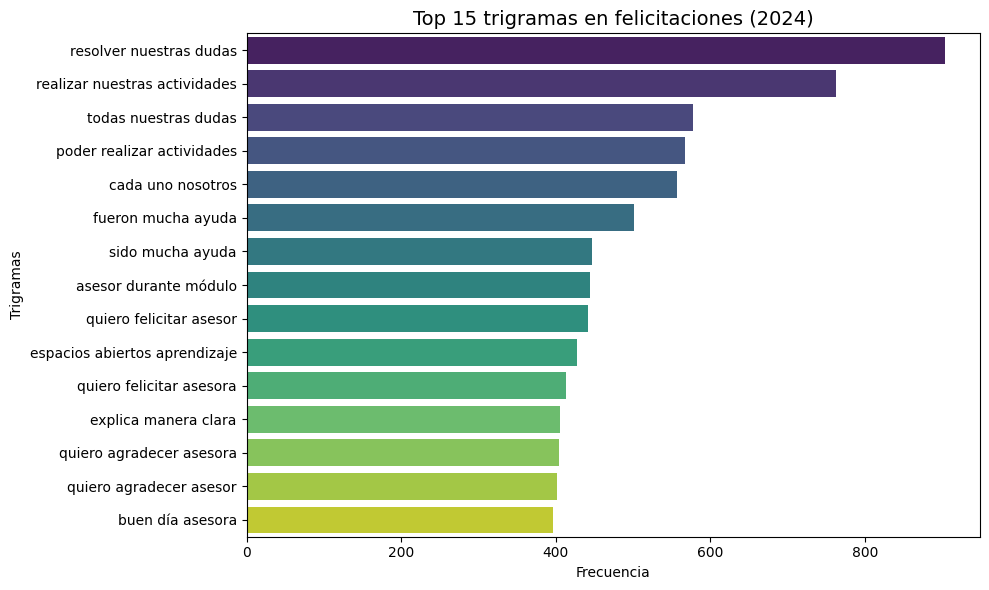

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
top_15 = df_ngrams.head(15)
sns.barplot(data=top_15, y='ngrama', x='frecuencia', palette='viridis')
plt.title('Top 15 trigramas en felicitaciones (2024)', fontsize=14)
plt.xlabel('Frecuencia')
plt.ylabel('Trigramas')
plt.tight_layout()
plt.show()

In [36]:
#!pip install pyvis

## Bigramas "Sugerencias"

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

stopwords_personalizadas = [
    'que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para',
    'es', 'al', 'del', 'se', 'lo', 'su', 'más', 'pero', 'no', 'muy', 'como', 'le', 'ha',
    'me', 'si', 'o', 'ya', 'todo', 'también', 'muy', 'sin', 'sobre', 'este', 'esta',
    'son', 'fue', 'ser', 'han', 'sus', 'gracias', 'mi', 'mucho', 'mis', 'nos', 'muchas', 
    'siempre', 'bien', 'agradezco', 'buenas', 'gran','usted', 'mas', 'así'
]

vectorizer = CountVectorizer(
    ngram_range=(2, 3),
    stop_words=stopwords_personalizadas,
    max_features=50
)

X = vectorizer.fit_transform(df['Sugerencias'].fillna(''))

frecuencias = X.toarray().sum(axis=0)
terminos = vectorizer.get_feature_names_out()

df_ngrams = pd.DataFrame({'ngrama': terminos, 'frecuencia': frecuencias})
df_ngrams = df_ngrams.sort_values(by='frecuencia', ascending=False)

print(df_ngrams.head(15))

                      ngrama  frecuencia
24        ninguna sugerencia        1092
45             tengo ninguna        1037
1   actividades integradoras         790
46  tengo ninguna sugerencia         668
18               hasta ahora         612
30      realizar actividades         589
36                  siga asi         533
26            nuestras dudas         485
13          excelente asesor         473
25      nuestras actividades         470
2                buen asesor         467
15         excelente trabajo         451
12         espacios abiertos         437
41               siga siendo         431
14         excelente asesora         413


## Trigramas en sugerencias

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

stopwords_personalizadas = [
    'que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para',
    'es', 'al', 'del', 'se', 'lo', 'su', 'más', 'pero', 'no', 'muy', 'como', 'le', 'ha',
    'me', 'si', 'o', 'ya', 'todo', 'también', 'muy', 'sin', 'sobre', 'este', 'esta',
    'son', 'fue', 'ser', 'han', 'sus', 'gracias', 'mi', 'mucho', 'mis', 'nos', 'muchas', 
    'siempre', 'bien', 'agradezco', 'buenas', 'gran','usted', 'mas', 'así'
]

vectorizer = CountVectorizer(
    ngram_range=(3, 3),
    stop_words=stopwords_personalizadas,
    max_features=50
)

X = vectorizer.fit_transform(df['Sugerencias'].fillna(''))

frecuencias = X.toarray().sum(axis=0)
terminos = vectorizer.get_feature_names_out()

df_ngrams = pd.DataFrame({'ngrama': terminos, 'frecuencia': frecuencias})
df_ngrams = df_ngrams.sort_values(by='frecuencia', ascending=False)

print(df_ngrams.head(15))

                               ngrama  frecuencia
45           tengo ninguna sugerencia         668
35                   siga hasta ahora         127
41                   tengo nada decir         115
8       espacios abiertos aprendizaje         105
29      realizar nuestras actividades          92
31           sesiones espacio abierto          91
22              momento tengo ninguna          84
39        sugerencia mejorar práctica          81
30            resolver nuestras dudas          79
4                   cada uno nosotros          76
26         poder realizar actividades          75
12                  hace buen trabajo          74
28  realizar actividades integradoras          73
13             hace excelente trabajo          68
44        tengo ninguna recomendación          62


C:\Users\mecat\AppData\Local\Temp\ipykernel_2436\2191462225.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15, y='ngrama', x='frecuencia', palette='viridis')


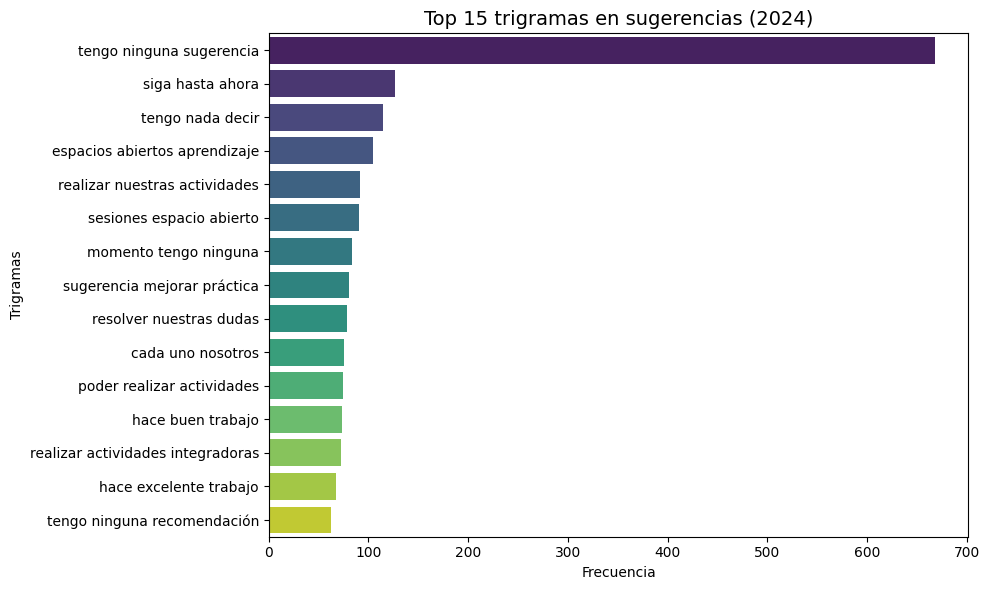

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
top_15 = df_ngrams.head(15)
sns.barplot(data=top_15, y='ngrama', x='frecuencia', palette='viridis')
plt.title('Top 15 trigramas en sugerencias (2024)', fontsize=14)
plt.xlabel('Frecuencia')
plt.ylabel('Trigramas')
plt.tight_layout()
plt.show()

## Programa interactivo para mostrar bigramas

Bigramas más frecuentes:

0: asesor virtual (5488)
1: asesora virtual (3001)
2: nuestras dudas (1930)
3: durante módulo (1731)
4: resolver dudas (1235)
5: quiero agradecer (1127)
6: excelente trabajo (1044)
7: realizar actividades (1004)
8: nuestras actividades (944)
9: manera clara (853)
10: prepa línea (833)
11: actividades integradoras (831)
12: cada actividad (779)
13: saludos cordiales (775)
14: mucha ayuda (774)
15: cada uno (721)
16: todas dudas (664)
17: excelente asesora (639)
18: quiero agradecerle (625)
19: buen día (621)
20: hola asesora (618)
21: espacios abiertos (617)
22: buen asesor (616)
23: apoyo brindado (604)
24: buen trabajo (599)
25: línea sep (598)
26: excelente asesor (585)
27: hola asesor (569)
28: espero encuentre (538)
29: comprender mejor (530)
30: tardes asesor (515)
31: hola tardes (511)
32: quiero felicitar (510)
33: cordial saludo (502)
34: buena asesora (480)
35: tardes asesora (475)
36: seguir adelante (464)
37: buenos días (460)
38: estas semanas (452


Ingresa el número del bigrama que quieres filtrar:  0



Has seleccionado el bigrama: 'asesor virtual'

Número de comentarios que contienen 'asesor virtual': 2898



,Felicitaciones
0,un gusto haberlo conocido una sola vez le habí...
1,quisiera felicitar a mi asesor virtual por su ...
3,es un asesor empático y conocedor de los temas...
4,hizo muy bien su trabajo enseñando y escribien...
5,las extenciones que te otorga solo eran de 4 a...
6,estimado asesor alejandro monroy trejo quiero ...
14,la verdad me gusto mucho como trabajo ya que ...
16,hola buen día estimado asesor edgar magaña ros...
19,hola que tal asesor espero que tenga un muy bu...
22,por el horario de las sesiones solo pude meter...


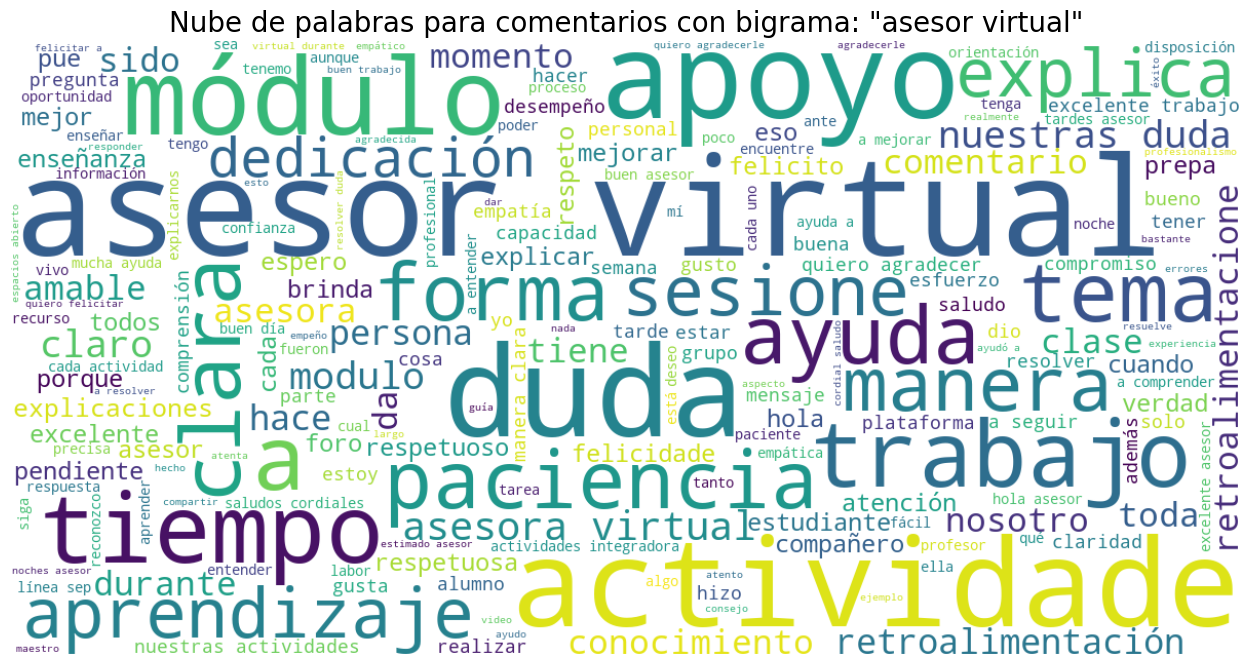

In [37]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Asumiendo que ya tienes df cargado y columna 'Felicitaciones'

# Paso 1: Extraer bigramas frecuentes con CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer


stopwords_personalizadas = [
    'que', 'y', 'de', 'la', 'el', 'en', 'los', 'las', 'un', 'una', 'con', 'por', 'para',
    'es', 'al', 'del', 'se', 'lo', 'su', 'más', 'pero', 'no', 'muy', 'como', 'le', 'ha',
    'me', 'si', 'o', 'ya', 'todo', 'también', 'muy', 'sin', 'sobre', 'este', 'esta',
    'son', 'fue', 'ser', 'han', 'sus', 'gracias', 'mi', 'mucho', 'mis', 'nos', 'muchas', 
    'siempre', 'bien', 'agradezco', 'buenas', 'gran','usted', 'mas', 'así'
]

vectorizer = CountVectorizer(
    ngram_range=(2, 2),  # bigramas
    stop_words=stopwords_personalizadas,
    max_features=50
)

X = vectorizer.fit_transform(df['Felicitaciones'].fillna(''))
frecuencias = X.toarray().sum(axis=0)
bigramas = vectorizer.get_feature_names_out()

df_bigrams = pd.DataFrame({'bigram': bigramas, 'frecuencia': frecuencias})
df_bigrams = df_bigrams.sort_values(by='frecuencia', ascending=False).reset_index(drop=True)

# Mostrar bigramas para elegir
print("Bigramas más frecuentes:\n")
for i, row in df_bigrams.iterrows():
    print(f"{i}: {row['bigram']} ({row['frecuencia']})")

# Paso 2: Pedir al usuario elegir un bigrama
indice = int(input("\nIngresa el número del bigrama que quieres filtrar: "))
bigram_seleccionado = df_bigrams.loc[indice, 'bigram']
print(f"\nHas seleccionado el bigrama: '{bigram_seleccionado}'")

# Paso 3: Filtrar comentarios que contienen el bigrama
# Convertimos a minúsculas para evitar problemas de mayúsculas/minúsculas
comentarios_filtrados = df[df['Felicitaciones'].str.lower().str.contains(bigram_seleccionado)]

print(f"\nNúmero de comentarios que contienen '{bigram_seleccionado}': {len(comentarios_filtrados)}\n")

# Mostrar algunos comentarios filtrados
display(comentarios_filtrados[['Felicitaciones']].head(10))

# Paso 4: Generar nube de palabras con los comentarios filtrados
texto_filtrado = ' '.join(comentarios_filtrados['Felicitaciones'].fillna('').astype(str))

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=stopwords_personalizadas
).generate(texto_filtrado)

plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Nube de palabras para comentarios con bigrama: "{bigram_seleccionado}"', fontsize=20)
plt.show()


In [14]:
!python --version

Python 3.12.10


In [15]:
!pip list

Package                   Version
------------------------- ---------------
absl-py                   2.1.0
affine                    2.4.0
aiosqlite                 0.21.0
altair                    5.5.0
annotated-types           0.7.0
anyio                     4.2.0
appdirs                   1.4.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     23.2.0
audioplayer               0.6
Babel                     2.14.0
beautifulsoup4            4.13.4
bleach                    6.1.0
blinker                   1.7.0
blis                      1.3.0
bokeh                     3.6.1
branca                    0.7.2
bs4                       0.0.2
cached-property           1.5.2
cachetools                6.1.0
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer 